In [31]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "ias15"
sim.dt = 0.001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e6*2.*np.pi

#np.random.seed(12)

In [32]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [33]:
# Embryos
# 行星胚胎群 a = 8 AU
n_embryos = 10
e = random.randint(1,10)*0.001*np.pi/180
#inc = random.randint(1,10)*0.001*np.pi/180
#Omega = random.randint(0,360)*np.pi/180
#omega = random.randint(0,360)*np.pi/180
m = 3*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 6 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 8 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [34]:
sim.move_to_com()
E0 = sim.calculate_energy()

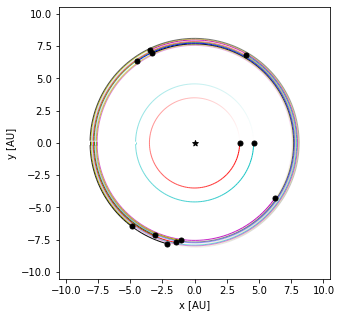

In [35]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [36]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

0.0006101250085555149


In [37]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Apr 22 2022 17:07:00
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	6.2831853071795860e+06
Current timestep:    	1.070339
---------------------------------
<rebound.particle.Particle object at 0x7f51fe8fecc0, m=1.0 x=6.033545949415755 y=4.902741426647145 z=0.0 vx=-0.0001960177444791985 vy=0.0005984963389640331 vz=0.0>
<rebound.particle.Particle object at 0x7f51fe8fedc0, m=0.0009730345110993763 x=2.5154808479971145 y=4.161732013712751 z=0.0 vx=0.11747229495035597 vy=-0.5018691260404168 vz=0.0>
<rebound.particle.Particle object at 0x7f51fe8fecc0, m=0.00031324956655444543 x=2.4709104337926218 y=1.543933790634917 z=0.0 vx=0.29253508286443186 vy=-0.3542857002522546 vz=0.0>
<rebound.particle.Particle object at 0x7f51fe8fedc0, m=2.7363893832203777e-05 x=7.609276836562258 y=14.607588717484424 z=0.0 vx=-0.3254967756763905 vy=0.06019017271456771 vz=0.0>
--------------------------------

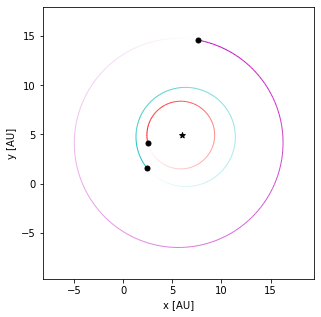

In [38]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)